### Problem 1: You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

In [129]:
# Importing all libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#sns.set_style('whitegrid')
#sns.set_palette('bright')
from warnings import filterwarnings
filterwarnings('ignore')

Data Dictionary

In [130]:
dictionary = pd.read_excel('Election Data Dictionary.xlsx')

In [131]:
dictionary

,vote,Party choice: Conservative or Labour
0,age,in years
1,economic.cond.national,Assessment of current national economic condit...
2,economic.cond.household,Assessment of current household economic condi...
3,Blair,"Assessment of the Labour leader, 1 to 5."
4,Hague,"Assessment of the Conservative leader, 1 to 5."
5,Europe,an 11-point scale that measures respondents' a...
6,political.knowledge,Knowledge of parties' positions on European in...
7,gender,female or male


### EXPLORATORY DATA ANALYSIS

#### 1.1 Read the dataset. Describe the data briefly. Interpret the inferences for each. Initial steps like head() .info(), Data Types, etc . Null value check, Summary stats, Skewness must be discussed.

In [132]:
df = pd.read_excel('Election_Data.xlsx')

In [133]:
df

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male
...,...,...,...,...,...,...,...,...,...,...
1520,1521,Conservative,67,5,3,2,4,11,3,male
1521,1522,Conservative,73,2,2,4,4,8,2,male
1522,1523,Labour,37,3,3,5,4,2,2,male
1523,1524,Conservative,61,3,3,1,4,11,2,male


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [135]:
df.isnull().sum()

Unnamed: 0                 0
vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [136]:
df.duplicated().sum()

0

In [137]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,1525.0,NaN,NaN,NaN,763.0,440.373894,1.0,382.0,763.0,1144.0,1525.0
vote,1525,2,Labour,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1525.0,NaN,NaN,NaN,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,NaN,NaN,NaN,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,NaN,NaN,NaN,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,NaN,NaN,NaN,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,NaN,NaN,NaN,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,NaN,NaN,NaN,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,NaN,NaN,NaN,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0
gender,1525,2,female,812,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [138]:
df = df.drop('Unnamed: 0', axis=1)

In [139]:
print('There are',df.duplicated().sum(), 'duplicate values in the dataset')

There are 8 duplicate values in the dataset


In [140]:
df.drop_duplicates(inplace=True)

In [141]:
df_numerical = df.select_dtypes(include='int64')
df_numerical

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
0,43,3,3,4,1,2,2
1,36,4,4,4,4,5,2
2,35,4,4,5,2,3,2
3,24,4,2,2,1,4,0
4,41,2,2,1,1,6,2
...,...,...,...,...,...,...,...
1520,67,5,3,2,4,11,3
1521,73,2,2,4,4,8,2
1522,37,3,3,5,4,2,2
1523,61,3,3,1,4,11,2


In [142]:
from scipy.stats import norm

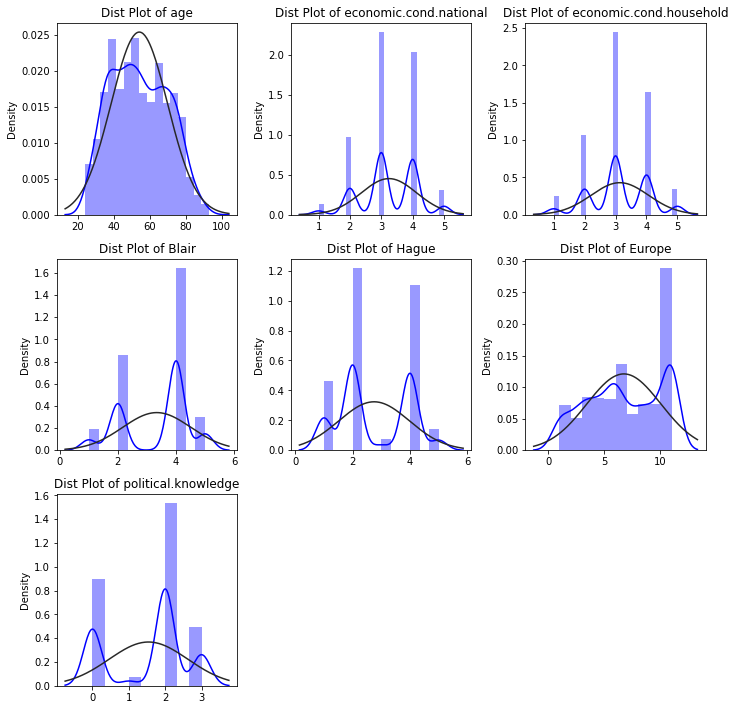

In [143]:
plt.figure(figsize = (10,13))
feature_list = df_numerical.columns
for i in range(len(feature_list)):
    plt.subplot(4,3,i+1)
    sns.distplot(x=df_numerical[feature_list[i]], color='b', fit=norm)
    plt.title('Dist Plot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [144]:
for columns in df_numerical.columns:
    print('Skewness of {} is'.format(columns), round(df_numerical[columns].skew(),2))
    print('Kurtosis of {} is'.format(columns), round(df_numerical[columns].kurt(),2))

Skewness of age is 0.14
Kurtosis of age is -0.94
Skewness of economic.cond.national is -0.24
Kurtosis of economic.cond.national is -0.26
Skewness of economic.cond.household is -0.14
Kurtosis of economic.cond.household is -0.21
Skewness of Blair is -0.54
Kurtosis of Blair is -1.06
Skewness of Hague is 0.15
Kurtosis of Hague is -1.4
Skewness of Europe is -0.14
Kurtosis of Europe is -1.24
Skewness of political.knowledge is -0.42
Kurtosis of political.knowledge is -1.22


#### 1.2 Perform EDA (Check the null values, Data types, shape, Univariate, bivariate analysis). Also check for outliers (4 pts). Interpret the inferences for each (3 pts) Distribution plots(histogram) or similar plots for the continuous columns. Box plots, Correlation plots. Appropriate plots for categorical variables. Inferences on each plot. Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.

In [145]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1517 non-null   object
 1   age                      1517 non-null   int64 
 2   economic.cond.national   1517 non-null   int64 
 3   economic.cond.household  1517 non-null   int64 
 4   Blair                    1517 non-null   int64 
 5   Hague                    1517 non-null   int64 
 6   Europe                   1517 non-null   int64 
 7   political.knowledge      1517 non-null   int64 
 8   gender                   1517 non-null   object
dtypes: int64(7), object(2)
memory usage: 118.5+ KB


In [147]:
df.shape

(1517, 9)

In [148]:
df['vote'].value_counts()

Labour          1057
Conservative     460
Name: vote, dtype: int64

In [149]:
df['gender'].value_counts()

female    808
male      709
Name: gender, dtype: int64

#### Univariate Analysis

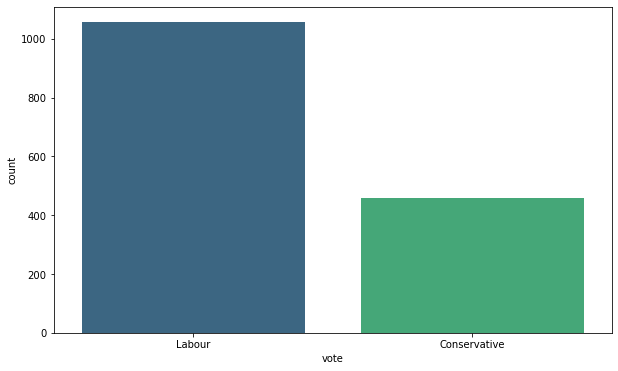

In [150]:
plt.figure(figsize=(10,6))
sns.countplot(df['vote'], palette='viridis');

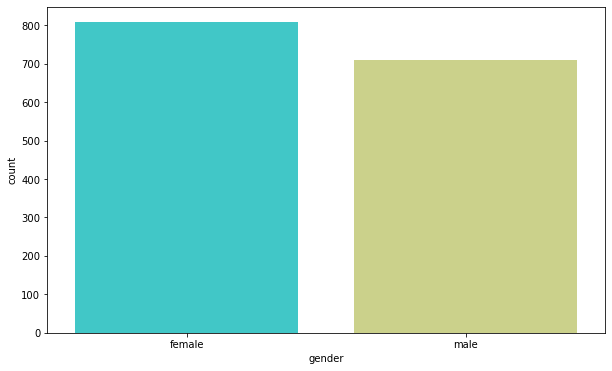

In [151]:
plt.figure(figsize=(10,6))
sns.countplot(df['gender'], palette='rainbow');

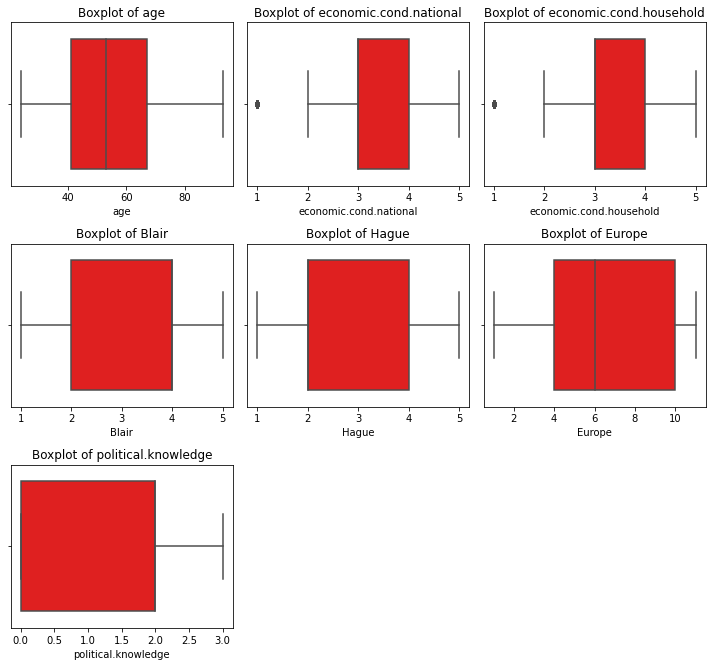

In [152]:
plt.figure(figsize = (10,12))
feature_list = df_numerical.columns
for i in range(len(feature_list)):
    plt.subplot(4,3,i+1)
    sns.boxplot(x=df_numerical[feature_list[i]], data=df_numerical, orient='h', color='r')
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

#### Bivariate / Multivariate Analysis

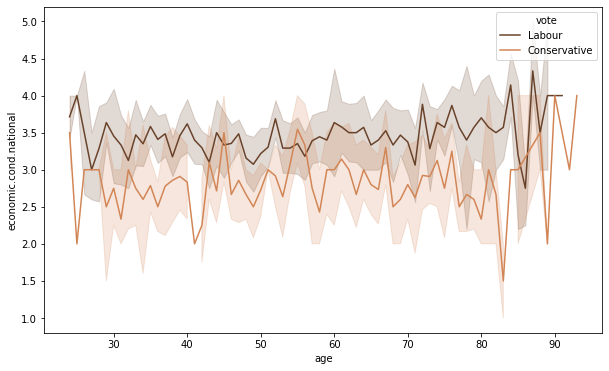

In [153]:
plt.figure(figsize=(10,6))
sns.lineplot(x='age', y='economic.cond.national', hue='vote', data=df, palette='copper');
plt.show()

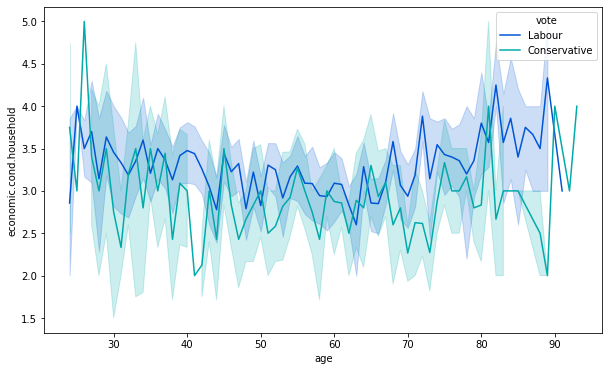

In [154]:
plt.figure(figsize=(10,6))
sns.lineplot(x='age', y='economic.cond.household', hue='vote', data=df, palette='winter');
plt.show()

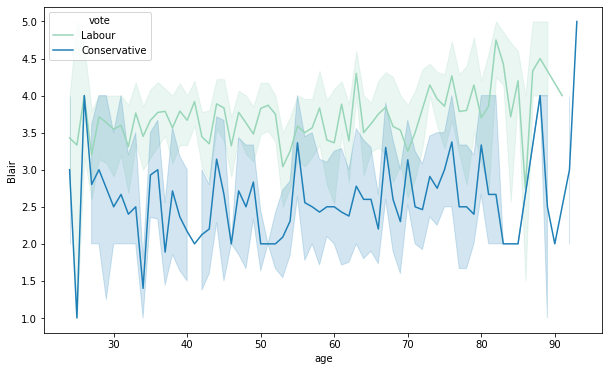

In [155]:
plt.figure(figsize=(10,6))
sns.lineplot(x='age', y='Blair', hue='vote', data=df, palette='YlGnBu');
plt.show()

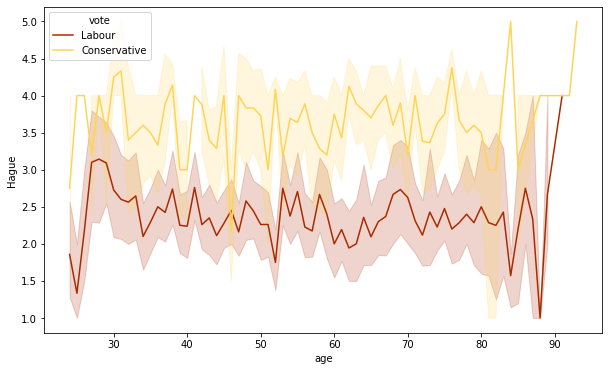

In [156]:
plt.figure(figsize=(10,6))
sns.lineplot(x='age', y='Hague', hue='vote', data=df, palette='afmhot');
plt.show()

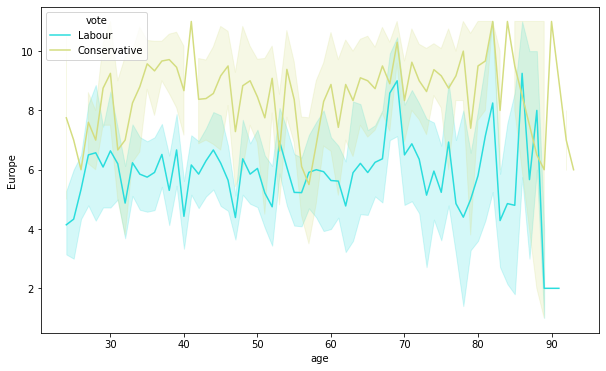

In [157]:
plt.figure(figsize=(10,6))
sns.lineplot(x='age', y='Europe', hue='vote', data=df, palette='rainbow');
plt.show()

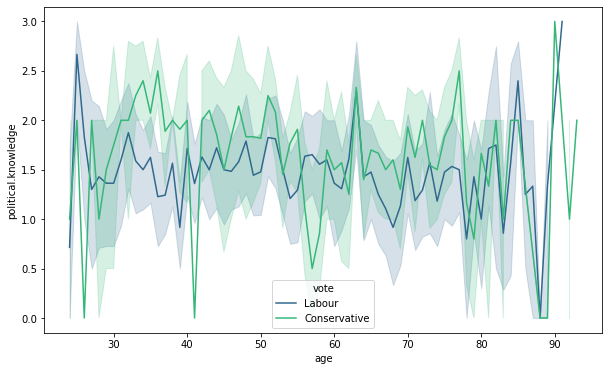

In [158]:
plt.figure(figsize=(10,6))
sns.lineplot(x='age', y='political.knowledge', hue='vote', data=df, palette='viridis');
plt.show()

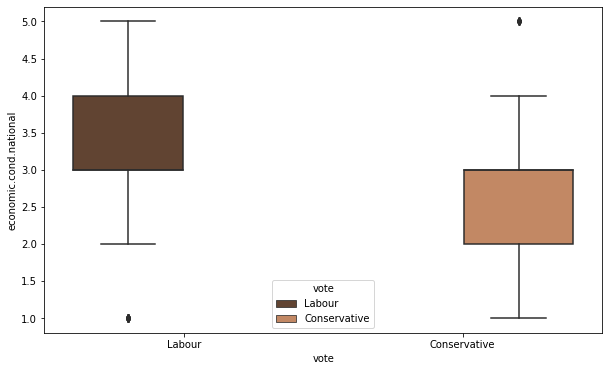

In [159]:
plt.figure(figsize=(10,6))
sns.boxplot(x='vote', y='economic.cond.national', hue='vote', data=df, palette='copper');
plt.show()

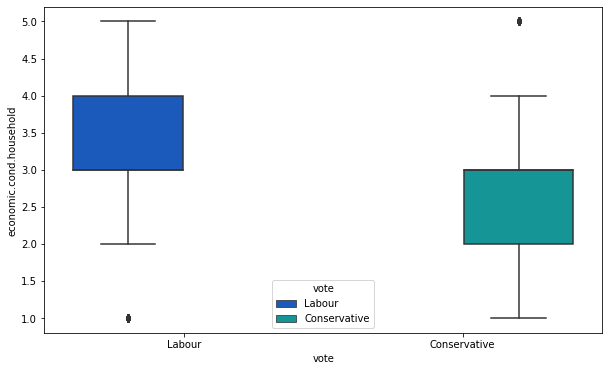

In [160]:
plt.figure(figsize=(10,6))
sns.boxplot(x='vote', y='economic.cond.household', hue='vote', data=df, palette='winter');
plt.show()

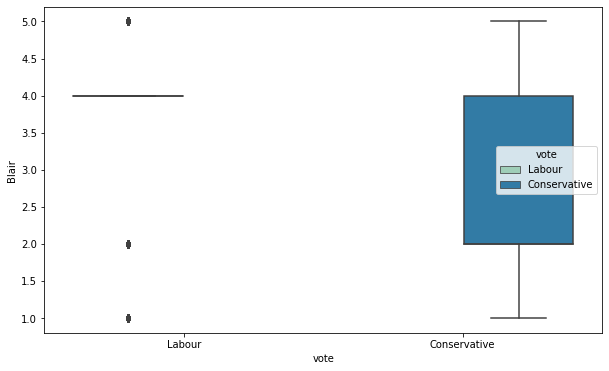

In [161]:
plt.figure(figsize=(10,6))
sns.boxplot(x='vote', y='Blair', hue='vote', data=df, palette='YlGnBu');
plt.show()

In [162]:
df['Blair'].value_counts()

4    833
2    434
5    152
1     97
3      1
Name: Blair, dtype: int64

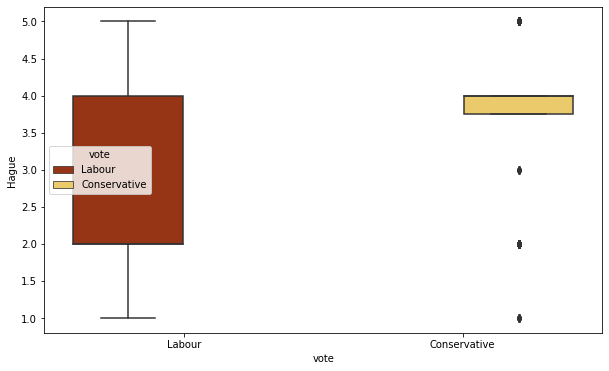

In [163]:
plt.figure(figsize=(10,6))
sns.boxplot(x='vote', y='Hague', hue='vote', data=df, palette='afmhot');
plt.show()

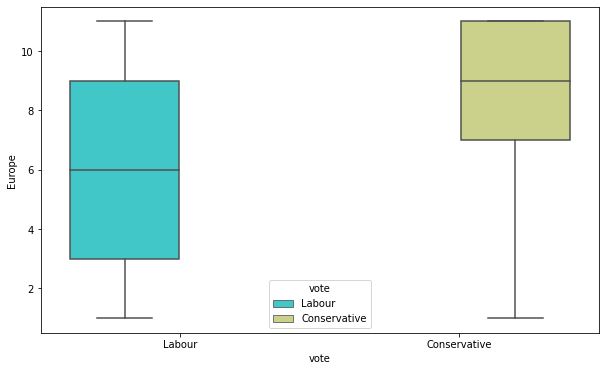

In [164]:
plt.figure(figsize=(10,6))
sns.boxplot(x='vote', y='Europe', hue='vote', data=df, palette='rainbow');
plt.show()

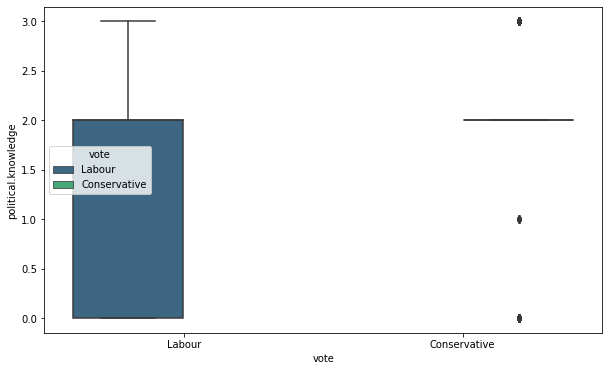

In [165]:
plt.figure(figsize=(10,6))
sns.boxplot(x='vote', y='political.knowledge', hue='vote', data=df, palette='viridis');
plt.show()

In [166]:
corr = df.corr()

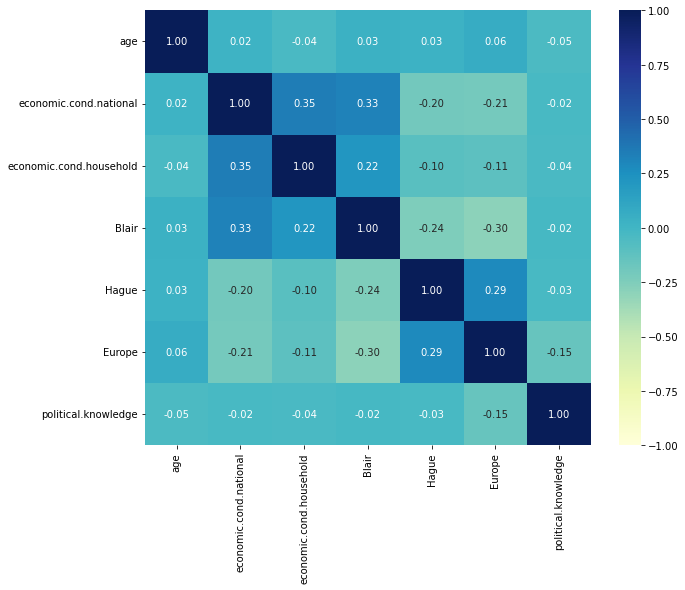

In [167]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='YlGnBu', vmax=1, vmin=-1, fmt='.2f');

<Figure size 864x720 with 0 Axes>

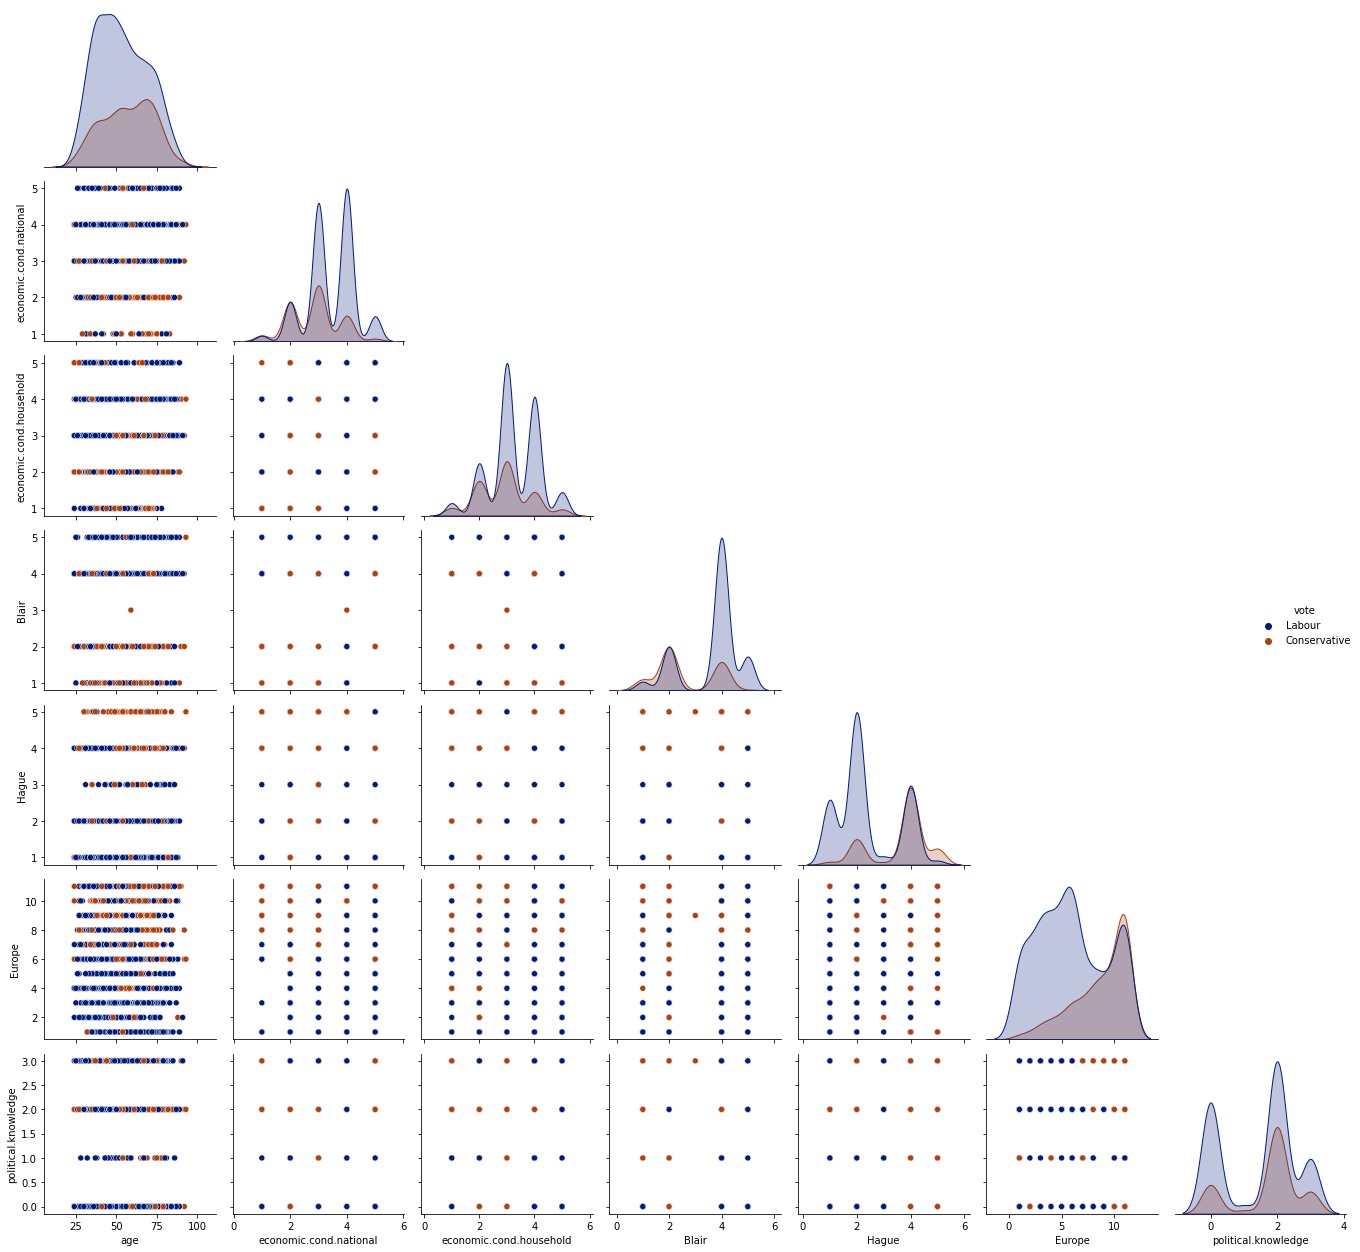

In [168]:
plt.figure(figsize=(12,10))
sns.pairplot(df, corner=True, diag_kind='kde', hue='vote', palette='dark');
plt.tight_layout()
plt.show()

#### 1.3

In [169]:
df.head(10)

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male
5,Labour,47,3,4,4,4,4,2,male
6,Labour,57,2,2,4,4,11,2,male
7,Labour,77,3,4,4,1,1,0,male
8,Labour,39,3,3,4,4,11,0,female
9,Labour,70,3,2,5,1,11,2,male


In [170]:
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = pd.Categorical(df[column]).codes

In [171]:
df.head(10)

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,43,3,3,4,1,2,2,0
1,1,36,4,4,4,4,5,2,1
2,1,35,4,4,5,2,3,2,1
3,1,24,4,2,2,1,4,0,0
4,1,41,2,2,1,1,6,2,1
5,1,47,3,4,4,4,4,2,1
6,1,57,2,2,4,4,11,2,1
7,1,77,3,4,4,1,1,0,1
8,1,39,3,3,4,4,11,0,0
9,1,70,3,2,5,1,11,2,1


In [172]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
vote,1517.0,0.696770,0.459805,0.0,0.0,1.0,1.0,1.0
age,1517.0,54.241266,15.701741,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1517.0,3.245221,0.881792,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1517.0,3.137772,0.931069,1.0,3.0,3.0,4.0,5.0
Blair,1517.0,3.335531,1.174772,1.0,2.0,4.0,4.0,5.0
Hague,1517.0,2.749506,1.232479,1.0,2.0,2.0,4.0,5.0
Europe,1517.0,6.740277,3.299043,1.0,4.0,6.0,10.0,11.0
political.knowledge,1517.0,1.540541,1.084417,0.0,0.0,2.0,2.0,3.0
gender,1517.0,0.467370,0.499099,0.0,0.0,0.0,1.0,1.0


In [173]:
df.std()

vote                        0.459805
age                        15.701741
economic.cond.national      0.881792
economic.cond.household     0.931069
Blair                       1.174772
Hague                       1.232479
Europe                      3.299043
political.knowledge         1.084417
gender                      0.499099
dtype: float64

In [174]:
df.var()

vote                         0.211421
age                        246.544655
economic.cond.national       0.777558
economic.cond.household      0.866890
Blair                        1.380089
Hague                        1.519005
Europe                      10.883687
political.knowledge          1.175961
gender                       0.249099
dtype: float64

In [175]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

In [176]:
y = df['vote']
x = df.drop('vote',axis=1)

In [177]:
print(y.shape)
print(x.shape)

(1517,)
(1517, 8)


In [178]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

In [179]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1061, 8)
(456, 8)
(1061,)
(456,)


In [180]:
df['vote'].value_counts(normalize=True)

1    0.69677
0    0.30323
Name: vote, dtype: float64

#### 1.4 Apply Logistic Regression and LDA (Linear Discriminant Analysis) (2 pts). Interpret the inferences of both model s (2 pts). Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)

In [181]:
model1 = LogisticRegression()
model1.fit(x_train, y_train)
ytrain_predict = model1.predict(x_train)
ytest_predict = model1.predict(x_test)

In [182]:
model1.score(x_train, y_train)*100

83.3176248821866

In [183]:
model1.score(x_test, y_test)*100

83.33333333333334

In [184]:
model2 = LinearDiscriminantAnalysis()
model2.fit(x_train, y_train)
ytrain_predict = model2.predict(x_train)
ytest_predict = model2.predict(x_test)

In [185]:
model2.score(x_train, y_train)*100

83.12912346842602

In [186]:
model2.score(x_test, y_test)*100

83.33333333333334

In [187]:
model1 = LogisticRegression(solver='lbfgs')
model2 = LogisticRegression(solver='newton-cg')
model3 = LinearDiscriminantAnalysis()

models=[model1, model2, model3]

scores_train=[]
scores_test=[]

for i in models:
    i.fit(x_train, y_train)
    scores_train.append(i.score(x_train, y_train))
    scores_test.append(i.score(x_test, y_test))
        
pd.DataFrame({'Scores_Train': scores_train,'Scores_Test': scores_test},
            index=['Logistic Regression - Solver lbfgs','Logistic Regression - Solver newton-cg','LDA'])

,Scores_Train,Scores_Test
Logistic Regression - Solver lbfgs,0.833176,0.833333
Logistic Regression - Solver newton-cg,0.833176,0.833333
LDA,0.831291,0.833333


    #### 1.5 Apply KNN Model and Naïve Bayes Model (2pts). Interpret the inferences of each model (2 pts). Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)

In [188]:
from scipy.stats import zscore

In [189]:
scaled = x.apply(zscore)
scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1517.0,1.917458e-17,1.00033,-1.926617,-0.843577,-0.079079,0.812836,2.469250
economic.cond.national,1517.0,-1.984789e-16,1.00033,-2.547041,-0.278185,-0.278185,0.856242,1.990670
economic.cond.household,1517.0,-2.397189e-16,1.00033,-2.296796,-0.148020,-0.148020,0.926367,2.000755
Blair,1517.0,-1.034842e-16,1.00033,-1.988727,-1.137217,0.565802,0.565802,1.417312
Hague,1517.0,5.386448e-17,1.00033,-1.419969,-0.608329,-0.608329,1.014951,1.826592
Europe,1517.0,6.293947e-17,1.00033,-1.740556,-0.830902,-0.224465,0.988407,1.291625
political.knowledge,1517.0,-7.665442e-16,1.00033,-1.421084,-1.421084,0.423832,0.423832,1.346290
gender,1517.0,2.648581e-16,1.00033,-0.936736,-0.936736,-0.936736,1.067536,1.067536


In [190]:
x_train, x_test, y_train, y_test = train_test_split(scaled, y, test_size=0.30, random_state=0)

In [191]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
naivebayes = GaussianNB()

models=[knn, naivebayes]

scores_train=[]
scores_test=[]

for i in models:
    i.fit(x_train, y_train)
    scores_train.append(i.score(x_train, y_train))
    scores_test.append(i.score(x_test, y_test))
        
pd.DataFrame({'Scores_Train': scores_train,'Scores_Test': scores_test},
            index=['KNN','Naive Bayes'])

,Scores_Train,Scores_Test
KNN,1.000000,0.815789
Naive Bayes,0.825636,0.846491


#### 1.6 Model Tuning (4 pts) , Bagging ( 1.5 pts) and Boosting (1.5 pts). Apply grid search on each model (include all models) and make models on best_params. Define a logic behind choosing particular values for different hyper-parameters for grid search. Compare and comment on performances of all. Comment on feature importance if applicable. Successful implementation of both algorithms along with inferences and comments on the model performances.

In [192]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [194]:
x_train, x_test, y_train, y_test = train_test_split(scaled,y,test_size=0.3, random_state=0)

In [196]:
rf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
rf.fit(x_train, y_train)
ytrain_predict = rf.predict(x_train)
ytest_predict = rf.predict(x_test)
rf.score(x_train, y_train)
rf.score(x_test, y_test)

0.8333333333333334

In [207]:
bagging_rf = BaggingClassifier(base_estimator=rf, n_estimators=40, random_state=0, bootstrap_features=True)
bagging_rf.fit(x_train, y_train)
ytrain_predict = bagging_rf.predict(x_train)
ytest_predict = bagging_rf.predict(x_test)
bagging_rf.score(x_train, y_train)
bagging_rf.score(x_test, y_test)

0.831140350877193

In [208]:
bagging1 = BaggingClassifier(base_estimator=knn, n_estimators=50, random_state=0)
bagging1.fit(x_train, y_train)
ytest_predict = bagging1.predict(x_test)
bagging1.score(x_test, y_test)

0.8201754385964912

In [209]:
bagging2 = BaggingClassifier(base_estimator=naivebayes, n_estimators=50, random_state=0)
bagging2.fit(x_train, y_train)
ytest_predict = bagging2.predict(x_test)
bagging2.score(x_test, y_test)

0.8464912280701754

In [210]:
bagging3 = BaggingClassifier(base_estimator=model1, n_estimators=50, random_state=0)
bagging3.fit(x_train, y_train)
ytest_predict = bagging3.predict(x_test)
bagging3.score(x_test, y_test)

0.8333333333333334

In [211]:
bagging4 = BaggingClassifier(base_estimator=model3, n_estimators=50, random_state=0)
bagging4.fit(x_train, y_train)
ytest_predict = bagging4.predict(x_test)
bagging4.score(x_test, y_test)

0.8355263157894737

In [212]:
boosting1 = AdaBoostClassifier(base_estimator=naivebayes, n_estimators=50, random_state=0)
boosting1.fit(x_train, y_train)
ytest_predict = boosting1.predict(x_test)
boosting1.score(x_test, y_test)

0.8245614035087719

In [213]:
boosting2 = AdaBoostClassifier(base_estimator=model1, n_estimators=50, random_state=0)
boosting2.fit(x_train, y_train)
ytest_predict = boosting2.predict(x_test)
boosting2.score(x_test, y_test)

0.831140350877193

In [214]:
g_boosting = GradientBoostingClassifier()
g_boosting.fit(x_train, y_train)
ytest_predict = g_boosting.predict(x_test)
g_boosting.score(x_test, y_test)

0.8464912280701754

In [215]:
grid={'penalty':['l2','l1','none'],
      'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
      'tol':[0.01,0.001]}
logistic_regression = LogisticRegression(max_iter=1000,n_jobs=2)
grid_search = GridSearchCV(estimator = logistic_regression, param_grid = grid, cv = 2, scoring='accuracy')
grid_search.fit(x_train, y_train)
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_, '\n')
print(grid_search.score(x_test, y_test))

{'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.01} 

LogisticRegression(max_iter=1000, n_jobs=2, penalty='l1', solver='liblinear',
                   tol=0.01) 

0.8377192982456141


In [216]:
grid={'solver':['svd', 'lsqr', 'eigen'],
      'tol':[0.01,0.001]}
LDA = LinearDiscriminantAnalysis()
grid_search = GridSearchCV(estimator = LDA, param_grid = grid, cv = 5, scoring='accuracy')
grid_search.fit(x_train, y_train)
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_, '\n')
print(grid_search.score(x_test, y_test))

{'solver': 'svd', 'tol': 0.01} 

LinearDiscriminantAnalysis(tol=0.01) 

0.8333333333333334


In [217]:
x_train, x_test, y_train, y_test = train_test_split(scaled, y, test_size=0.30, random_state=0)

In [218]:
x_train

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1373,-0.270203,-0.278185,-1.222408,-1.137217,-0.608329,1.291625,-1.421084,-0.936736
252,-1.416951,-0.278185,-1.222408,1.417312,-1.419969,-0.224465,0.423832,-0.936736
412,-1.225827,0.856242,-0.148020,0.565802,1.014951,1.291625,0.423832,1.067536
549,-1.608076,0.856242,-0.148020,0.565802,-0.608329,-0.830902,0.423832,-0.936736
250,1.577335,-0.278185,-0.148020,1.417312,-1.419969,1.291625,0.423832,1.067536
...,...,...,...,...,...,...,...,...
765,-0.333912,-0.278185,2.000755,0.565802,1.014951,0.381971,0.423832,-0.936736
837,1.449918,-1.412613,-0.148020,-1.137217,-0.608329,0.988407,0.423832,-0.936736
1221,1.131377,-1.412613,-1.222408,-1.988727,1.014951,1.291625,0.423832,1.067536
560,-0.779869,0.856242,0.926367,0.565802,-0.608329,1.291625,-1.421084,1.067536


In [219]:
ann = MLPClassifier(hidden_layer_sizes=(500),random_state=123, max_iter=10000)
rf = RandomForestClassifier(random_state=123)
dt = DecisionTreeClassifier(random_state=123)
logreg = LogisticRegression()
lda = LinearDiscriminantAnalysis()
knn = KNeighborsClassifier()
bayes = GaussianNB()

models=[ann, rf, dt, logreg, lda, knn, bayes]

scores_train=[]
scores_test=[]

for i in models:
    i.fit(x_train,y_train)
    scores_train.append(i.score(x_train, y_train))
    scores_test.append(i.score(x_test, y_test))

model_perf = pd.DataFrame({'Training Score':scores_train,'Test Score': scores_test},
            index=['ANN','Random Forest','Decision Tree', 'Logistic Regression', 'LDA', 'KNN', 'Naive Bayes'])
model_perf['Difference'] = model_perf['Training Score'] - model_perf['Test Score']
model_perf.sort_values('Difference', ascending=True)

,Training Score,Test Score,Difference
Naive Bayes,0.825636,0.846491,-0.020855
LDA,0.831291,0.833333,-0.002042
Logistic Regression,0.833176,0.833333,-0.000157
KNN,0.866164,0.828947,0.037217
ANN,0.993402,0.824561,0.168841
Random Forest,1.000000,0.831140,0.168860
Decision Tree,1.000000,0.800439,0.199561


In [220]:
ann = BaggingClassifier(base_estimator=ann, random_state=0)
rf = BaggingClassifier(base_estimator=rf, random_state=0)
dt = BaggingClassifier(base_estimator=dt, random_state=0)
logreg = BaggingClassifier(base_estimator=logreg, random_state=0)
lda = BaggingClassifier(base_estimator=lda, random_state=0)
knn = BaggingClassifier(base_estimator=knn, random_state=0)
bayes = BaggingClassifier(base_estimator=bayes, random_state=0)

models=[ann, rf, dt, logreg, lda, knn, bayes]

scores_train=[]
scores_test=[]

for i in models:
    i.fit(x_train,y_train)
    scores_train.append(i.score(x_train, y_train))
    scores_test.append(i.score(x_test, y_test))

model_perf = pd.DataFrame({'Training Score':scores_train,'Test Score': scores_test},
            index=['ANN','Random Forest','Decision Tree', 'Logistic Regression', 'LDA', 'KNN', 'Naive Bayes'])
model_perf['Difference'] = model_perf['Training Score'] - model_perf['Test Score']
model_perf.sort_values('Difference', ascending=True)

,Training Score,Test Score,Difference
Naive Bayes,0.826579,0.846491,-0.019913
LDA,0.834119,0.837719,-0.003601
Logistic Regression,0.836004,0.831140,0.004863
KNN,0.870877,0.824561,0.046315
ANN,0.970782,0.844298,0.126484
Random Forest,0.966070,0.835526,0.130543
Decision Tree,0.979265,0.789474,0.189791


In [221]:
param_grid={'n_neighbors':[15,20,25,30], 'weights':['uniform', 'distance']}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(estimator = knn, param_grid = param_grid, cv = 5, scoring='accuracy')
grid_search.fit(x_train, y_train)
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_, '\n')
print(grid_search.score(x_test, y_test))

{'n_neighbors': 25, 'weights': 'distance'} 

KNeighborsClassifier(n_neighbors=25, weights='distance') 

0.8267543859649122


In [222]:
param_grid={'hidden_layer_sizes':[10,50,100],
    'activation':['identity', 'logistic', 'tanh', 'relu'],
     'solver':['lbfgs', 'sgd', 'adam']}
ann = MLPClassifier()
grid_search = GridSearchCV(estimator = ann, param_grid = param_grid, cv = 5, scoring='accuracy')
grid_search.fit(x_train, y_train)
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_, '\n')
print(grid_search.score(x_test, y_test))

{'activation': 'identity', 'hidden_layer_sizes': 50, 'solver': 'sgd'} 

MLPClassifier(activation='identity', hidden_layer_sizes=50, solver='sgd') 

0.8399122807017544


In [223]:
param_grid={'n_estimators':[10,50,100],
           'criterion':["gini", "entropy"],
           'max_depth':[8,10,12],
           'min_samples_split':[2,3,5,10],
           'min_samples_leaf':[3,5,6]}
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, scoring='accuracy')
grid_search.fit(x_train, y_train)
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_, '\n')
print(grid_search.score(x_test, y_test))

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 100} 

RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_leaf=5,
                       min_samples_split=5) 

0.8377192982456141


In [224]:
param_grid={'criterion':["gini", "entropy"],
           'max_depth':[4,5,8],
           'min_samples_split':[20,50,100],
           'min_samples_leaf':[6]}
dt = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, cv = 5, scoring='accuracy')
grid_search.fit(x_train, y_train)
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_, '\n')
print(grid_search.score(x_test, y_test))

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 6, 'min_samples_split': 50} 

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=6,
                       min_samples_split=50) 

0.8552631578947368


#### 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model, classification report (4 pts) Final Model - Compare and comment on all models on the basis of the performance metrics in a structured tabular manner. Describe on which model is best/optimized, After comparison which model suits the best for the problem in hand on the basis of different measures. Comment on the final model.(3 pts)

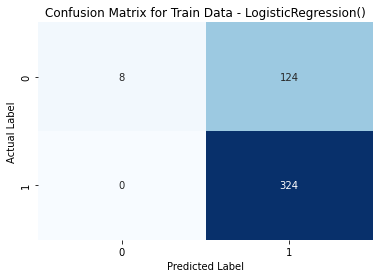

              precision    recall  f1-score   support

           0       0.93      0.12      0.21       328
           1       0.72      1.00      0.83       733

    accuracy                           0.72      1061
   macro avg       0.82      0.56      0.52      1061
weighted avg       0.78      0.72      0.64      1061



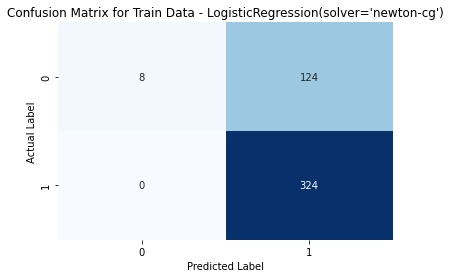

              precision    recall  f1-score   support

           0       0.93      0.12      0.21       328
           1       0.72      1.00      0.83       733

    accuracy                           0.72      1061
   macro avg       0.82      0.56      0.52      1061
weighted avg       0.78      0.72      0.64      1061



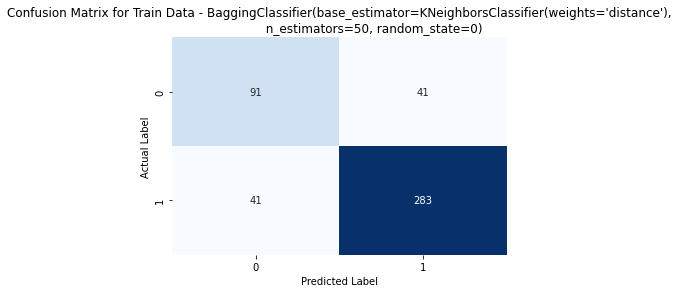

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       328
           1       1.00      1.00      1.00       733

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



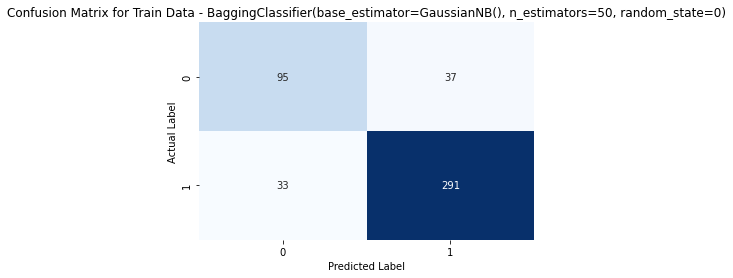

              precision    recall  f1-score   support

           0       0.73      0.70      0.71       328
           1       0.87      0.88      0.88       733

    accuracy                           0.83      1061
   macro avg       0.80      0.79      0.79      1061
weighted avg       0.82      0.83      0.83      1061



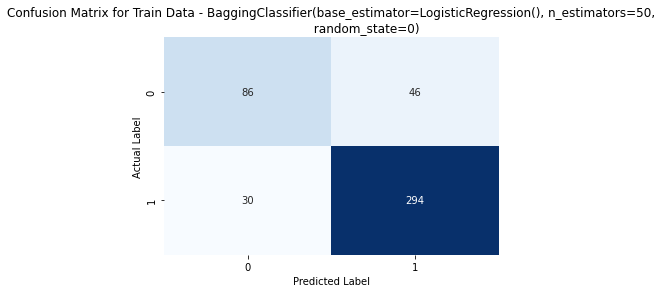

              precision    recall  f1-score   support

           0       0.77      0.67      0.72       328
           1       0.86      0.91      0.89       733

    accuracy                           0.84      1061
   macro avg       0.82      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



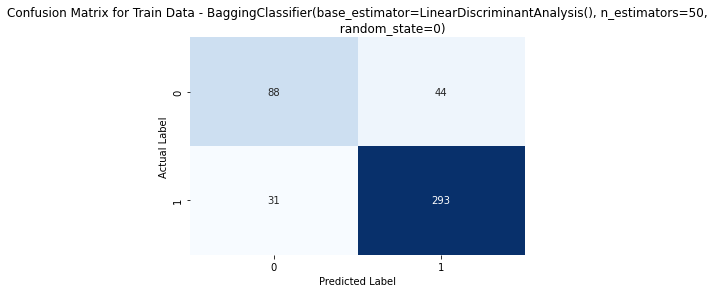

              precision    recall  f1-score   support

           0       0.75      0.68      0.72       328
           1       0.86      0.90      0.88       733

    accuracy                           0.83      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.83      0.83      0.83      1061



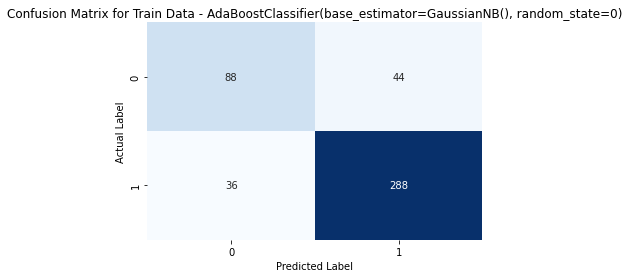

              precision    recall  f1-score   support

           0       0.76      0.68      0.72       328
           1       0.86      0.90      0.88       733

    accuracy                           0.83      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.83      0.83      0.83      1061



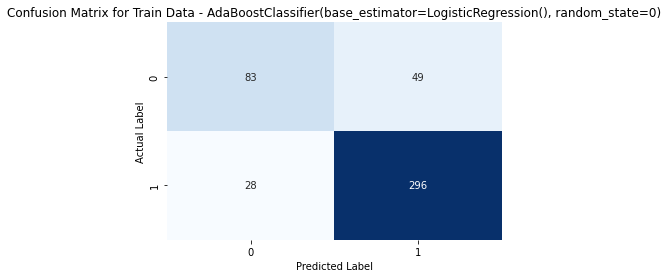

              precision    recall  f1-score   support

           0       0.77      0.67      0.72       328
           1       0.86      0.91      0.88       733

    accuracy                           0.84      1061
   macro avg       0.82      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



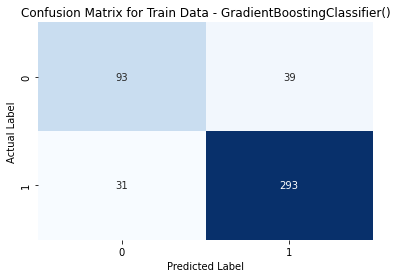

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       328
           1       0.91      0.93      0.92       733

    accuracy                           0.89      1061
   macro avg       0.87      0.86      0.86      1061
weighted avg       0.88      0.89      0.88      1061



In [225]:
models = [model1,model2,bagging1,bagging2,bagging3,bagging4,boosting1,boosting2,g_boosting]

for i in models:
    ytrain_predict = i.predict(x_train)
    ytest_predict = i.predict(x_test)
    confusion_matrix(y_train, ytrain_predict)
    sns.heatmap(confusion_matrix(y_test, ytest_predict),annot=True, fmt='d',cbar=False, cmap=plt.cm.Blues)
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.title('Confusion Matrix for Train Data - {}'.format(i))
    plt.show()
    print(classification_report(y_train, ytrain_predict))

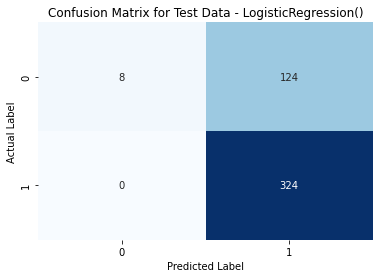

              precision    recall  f1-score   support

           0       1.00      0.06      0.11       132
           1       0.72      1.00      0.84       324

    accuracy                           0.73       456
   macro avg       0.86      0.53      0.48       456
weighted avg       0.80      0.73      0.63       456



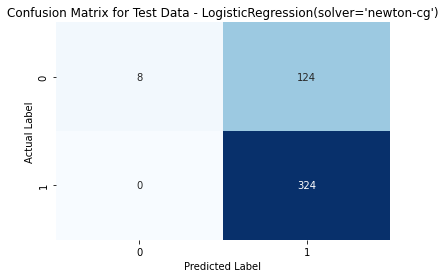

              precision    recall  f1-score   support

           0       1.00      0.06      0.11       132
           1       0.72      1.00      0.84       324

    accuracy                           0.73       456
   macro avg       0.86      0.53      0.48       456
weighted avg       0.80      0.73      0.63       456



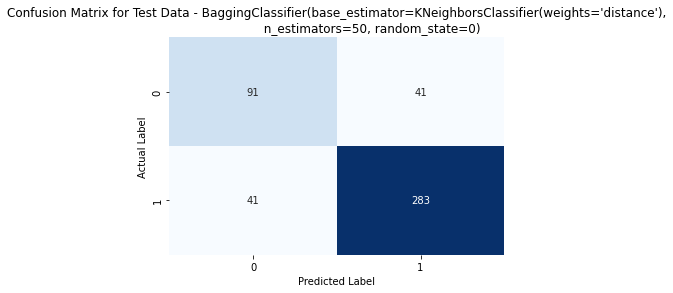

              precision    recall  f1-score   support

           0       0.69      0.69      0.69       132
           1       0.87      0.87      0.87       324

    accuracy                           0.82       456
   macro avg       0.78      0.78      0.78       456
weighted avg       0.82      0.82      0.82       456



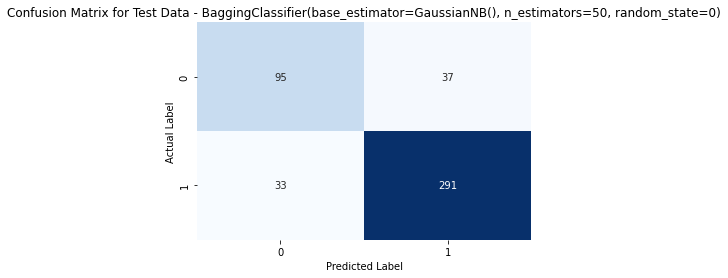

              precision    recall  f1-score   support

           0       0.74      0.72      0.73       132
           1       0.89      0.90      0.89       324

    accuracy                           0.85       456
   macro avg       0.81      0.81      0.81       456
weighted avg       0.85      0.85      0.85       456



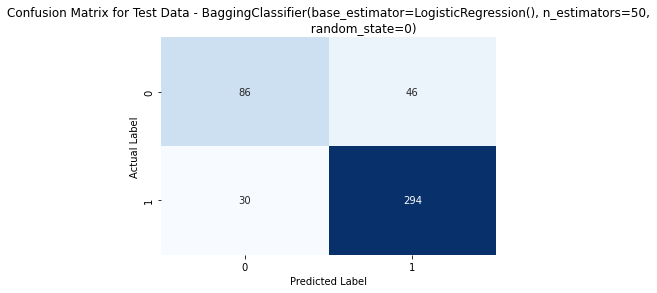

              precision    recall  f1-score   support

           0       0.74      0.65      0.69       132
           1       0.86      0.91      0.89       324

    accuracy                           0.83       456
   macro avg       0.80      0.78      0.79       456
weighted avg       0.83      0.83      0.83       456



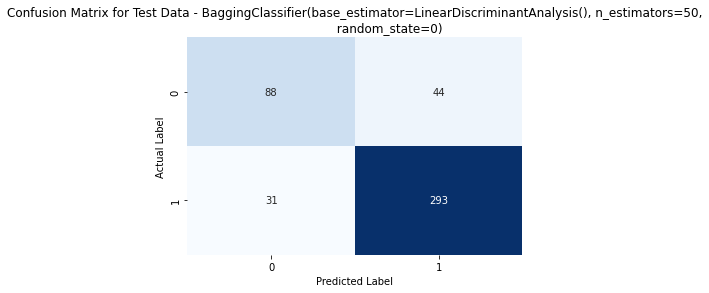

              precision    recall  f1-score   support

           0       0.74      0.67      0.70       132
           1       0.87      0.90      0.89       324

    accuracy                           0.84       456
   macro avg       0.80      0.79      0.79       456
weighted avg       0.83      0.84      0.83       456



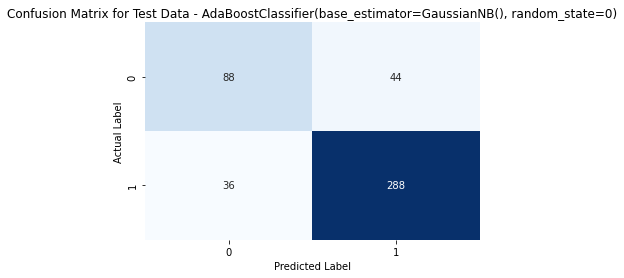

              precision    recall  f1-score   support

           0       0.71      0.67      0.69       132
           1       0.87      0.89      0.88       324

    accuracy                           0.82       456
   macro avg       0.79      0.78      0.78       456
weighted avg       0.82      0.82      0.82       456



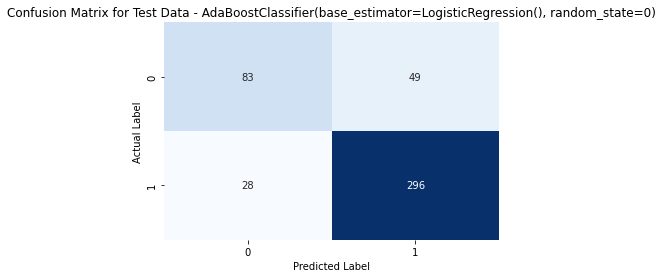

              precision    recall  f1-score   support

           0       0.75      0.63      0.68       132
           1       0.86      0.91      0.88       324

    accuracy                           0.83       456
   macro avg       0.80      0.77      0.78       456
weighted avg       0.83      0.83      0.83       456



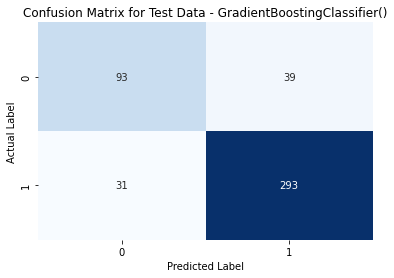

              precision    recall  f1-score   support

           0       0.75      0.70      0.73       132
           1       0.88      0.90      0.89       324

    accuracy                           0.85       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.84      0.85      0.85       456



In [226]:
models = [model1,model2,bagging1,bagging2,bagging3,bagging4,boosting1,boosting2,g_boosting]

for i in models:
    ytest_predict = i.predict(x_test)
    confusion_matrix(y_test, ytest_predict)
    sns.heatmap(confusion_matrix(y_test, ytest_predict),annot=True, fmt='d',cbar=False, cmap=plt.cm.Blues)
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.title('Confusion Matrix for Test Data - {}'.format(i))
    plt.show()
    print(classification_report(y_test, ytest_predict))

In [227]:
perf_table = pd.read_excel('ModelComparisonTable.xlsx')
perf_table

,Model,Metrics,Train Data,Test Data,Perc,Difference
0,Logistic Regression,Accuracy,0.72,0.73,100,-1.0
1,Logistic Regression(solver='newton-cg'),Accuracy,0.72,0.73,100,-1.0
2,Bagging - KNN,Accuracy,1.00,0.82,100,18.0
3,Bagging - Naïve Bayes,Accuracy,0.83,0.85,100,-2.0
4,Bagging - Logistic Regression,Accuracy,0.84,0.83,100,1.0
5,Bagging - LDA,Accuracy,0.83,0.84,100,-1.0
6,AdaBoost - Naïve Bayes,Accuracy,0.83,0.82,100,1.0
7,AdaBoost - Logistic Regression,Accuracy,0.84,0.83,100,1.0
8,Gradient Boosting,Accuracy,0.89,0.85,100,4.0


In [228]:
from sklearn.metrics import plot_roc_curve

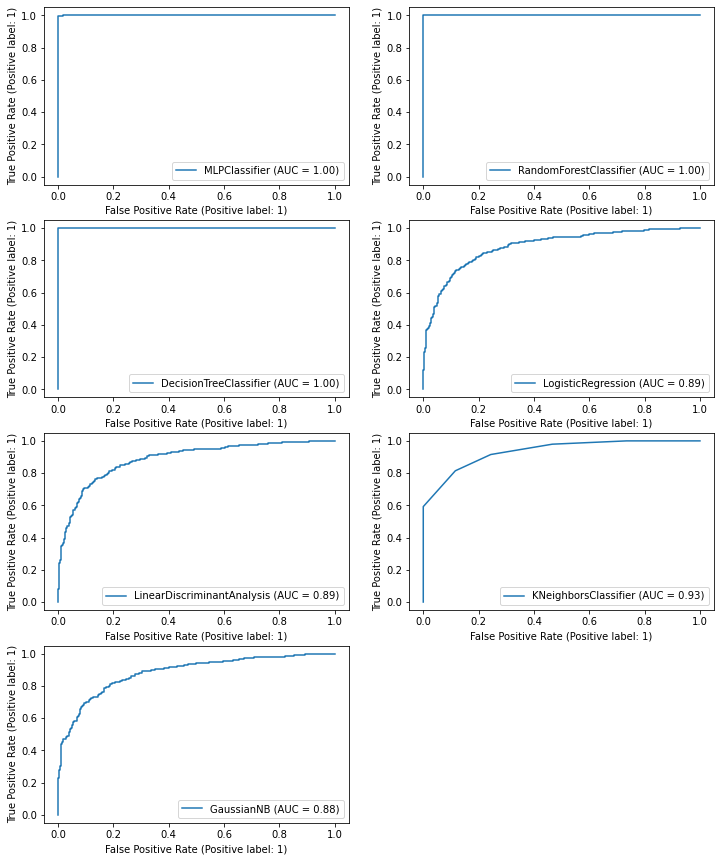

In [229]:
ann = MLPClassifier(hidden_layer_sizes=(500),random_state=123, max_iter=10000)
rf = RandomForestClassifier(random_state=123)
dt = DecisionTreeClassifier(random_state=123)
logreg = LogisticRegression()
lda = LinearDiscriminantAnalysis()
knn = KNeighborsClassifier()
bayes = GaussianNB()

models=[ann, rf, dt, logreg, lda, knn, bayes]
fig = plt.figure(figsize=(12,15))
for index, model in enumerate(models,1):
    model.fit(x_train,y_train)
    ax = plt.subplot(4, 2, index)
    plot_roc_curve(model, x_train, y_train, ax=ax)  
plt.show()

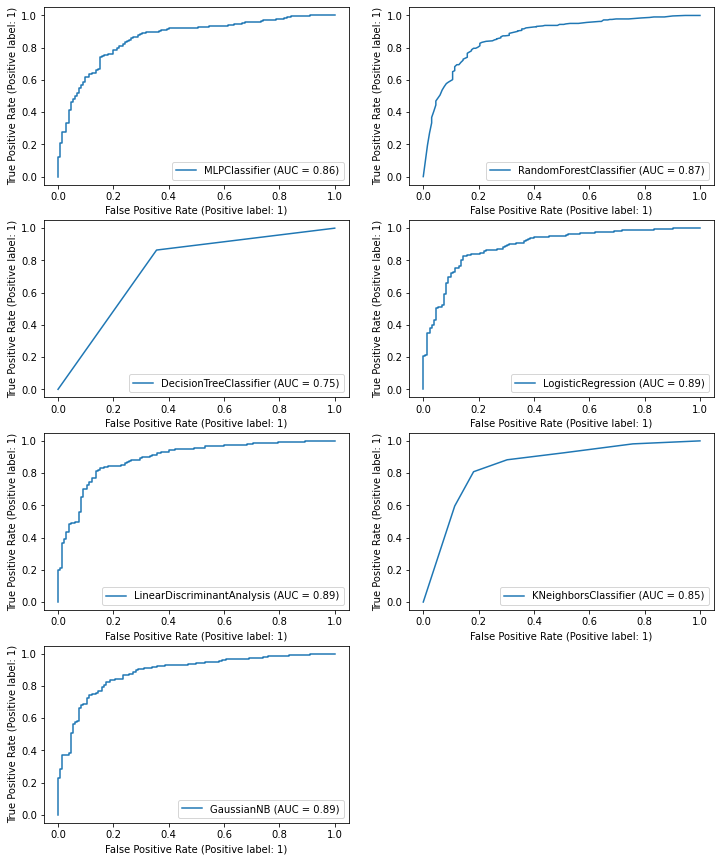

In [230]:
ann = MLPClassifier(hidden_layer_sizes=(500),random_state=123, max_iter=10000)
rf = RandomForestClassifier(random_state=123)
dt = DecisionTreeClassifier(random_state=123)
logreg = LogisticRegression()
lda = LinearDiscriminantAnalysis()
knn = KNeighborsClassifier()
bayes = GaussianNB()

models=[ann, rf, dt, logreg, lda, knn, bayes]
fig = plt.figure(figsize=(12,15))
for index, model in enumerate(models,1):
    model.fit(x_train,y_train)
    ax = plt.subplot(4, 2, index)
    plot_roc_curve(model, x_test, y_test, ax=ax)  
plt.show()

In [231]:
ann = MLPClassifier(hidden_layer_sizes=(500),random_state=123, max_iter=10000)
rf = RandomForestClassifier(random_state=123)
dt = DecisionTreeClassifier(random_state=123)
logreg = LogisticRegression()
lda = LinearDiscriminantAnalysis()
knn = KNeighborsClassifier()
bayes = GaussianNB()

models=[ann, rf, dt, logreg, lda, knn, bayes]
scores_train=[]
scores_test=[]
for i in models:
    i.fit(x_train, y_train)
    scores_train.append(i.score(x_train, y_train))
    scores_test.append(i.score(x_test, y_test))
    
accuracy_scores = pd.DataFrame({'Accuracy Train':scores_train,'Accuracy Test': scores_test},
            index=['ANN','Random Forest','Decision Tree', 'Logistic Regression', 'LDA', 'KNN', 'Naive Bayes']) 
accuracy_scores

,Accuracy Train,Accuracy Test
ANN,0.993402,0.824561
Random Forest,1.000000,0.831140
Decision Tree,1.000000,0.800439
Logistic Regression,0.833176,0.833333
LDA,0.831291,0.833333
KNN,0.866164,0.828947
Naive Bayes,0.825636,0.846491


In [232]:
models=[ann, rf, dt, logreg, lda, knn, bayes]
auc_train=[]
for i in models:
    probs = i.predict_proba(x_train)
    probs = probs[:, 1]
    auc_train.append((roc_auc_score(y_train, probs)))
    
AUC_scores_train = pd.DataFrame({'AUC Train':auc_train},
            index=['ANN','Random Forest','Decision Tree', 'Logistic Regression', 'LDA', 'KNN', 'Naive Bayes']) 
AUC_scores_train    

,AUC Train
ANN,0.999913
Random Forest,1.000000
Decision Tree,1.000000
Logistic Regression,0.887553
LDA,0.887353
KNN,0.933894
Naive Bayes,0.883394


In [233]:
perf_matrix = pd.DataFrame({'Training Score':scores_train,'Test Score': scores_test},
            index=['ANN','Random Forest','Decision Tree', 'Logistic Regression', 'LDA', 'KNN', 'Naive Bayes'])

In [234]:
models=[ann, rf, dt, logreg, lda, knn, bayes]
auc_test=[]
for i in models:
    probs = i.predict_proba(x_test)
    probs = probs[:, 1]
    auc_test.append((roc_auc_score(y_test, probs)))
    
AUC_scores_test = pd.DataFrame({'AUC Test':auc_test},
            index=['ANN','Random Forest','Decision Tree', 'Logistic Regression', 'LDA', 'KNN', 'Naive Bayes']) 
AUC_scores_test    

,AUC Test
ANN,0.859848
Random Forest,0.872568
Decision Tree,0.754068
Logistic Regression,0.891110
LDA,0.891110
KNN,0.847807
Naive Bayes,0.886060


In [235]:
first_merge = accuracy_scores.merge(AUC_scores_train,how='outer', left_index=True, right_index=True)
first_merge

,Accuracy Train,Accuracy Test,AUC Train
ANN,0.993402,0.824561,0.999913
Random Forest,1.000000,0.831140,1.000000
Decision Tree,1.000000,0.800439,1.000000
Logistic Regression,0.833176,0.833333,0.887553
LDA,0.831291,0.833333,0.887353
KNN,0.866164,0.828947,0.933894
Naive Bayes,0.825636,0.846491,0.883394


In [236]:
second_merge = first_merge.merge(AUC_scores_test, how='outer', left_index=True, right_index=True)
second_merge

,Accuracy Train,Accuracy Test,AUC Train,AUC Test
ANN,0.993402,0.824561,0.999913,0.859848
Random Forest,1.000000,0.831140,1.000000,0.872568
Decision Tree,1.000000,0.800439,1.000000,0.754068
Logistic Regression,0.833176,0.833333,0.887553,0.891110
LDA,0.831291,0.833333,0.887353,0.891110
KNN,0.866164,0.828947,0.933894,0.847807
Naive Bayes,0.825636,0.846491,0.883394,0.886060


In [237]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.metrics import precision_score, recall_score, auc,roc_curve, f1_score
import warnings
warnings.filterwarnings('ignore')

names = ["Nearest Neighbors", "Decision Tree", "Random Forest", "ANN", "AdaBoost",
         "Naive Bayes", "QDA", 'LDA', 'Logistic Regression']

classifiers = [
    KNeighborsClassifier(3),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    LinearDiscriminantAnalysis(),
    LogisticRegression()]

x_train, x_test, y_train, y_test = train_test_split(scaled,y,test_size=0.3,
                                                    random_state=1)


In [238]:
model_cols = []
df=pd.DataFrame(columns=model_cols)
index=0

for name, clf in zip(names, classifiers):
    clf.fit(x_train,y_train)
    df.loc[index,'Classifiers'] = name
    df.loc[index,'Train Accuracy'] = clf.score(x_train,y_train)
    df.loc[index,'Test Accuracy'] = clf.score(x_test,y_test)
    df.loc[index,'Precision'] = precision_score(y_test,clf.predict(x_test))
    df.loc[index,'Recall'] = recall_score(y_test,clf.predict(x_test))
    df.loc[index,'F1 Score'] = f1_score(y_test,clf.predict(x_test))
    index+=1
df

,Classifiers,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score
0,Nearest Neighbors,0.870877,0.809211,0.837500,0.884488,0.860353
1,Decision Tree,0.859566,0.802632,0.849180,0.854785,0.851974
2,Random Forest,0.843544,0.824561,0.817664,0.947195,0.877676
3,ANN,0.849199,0.839912,0.861635,0.904290,0.882448
4,AdaBoost,0.846371,0.813596,0.847134,0.877888,0.862237
5,Naive Bayes,0.835061,0.822368,0.865132,0.867987,0.866557
6,QDA,0.839774,0.828947,0.854890,0.894389,0.874194
7,LDA,0.834119,0.833333,0.864952,0.887789,0.876221
8,Logistic Regression,0.831291,0.831140,0.864516,0.884488,0.874388


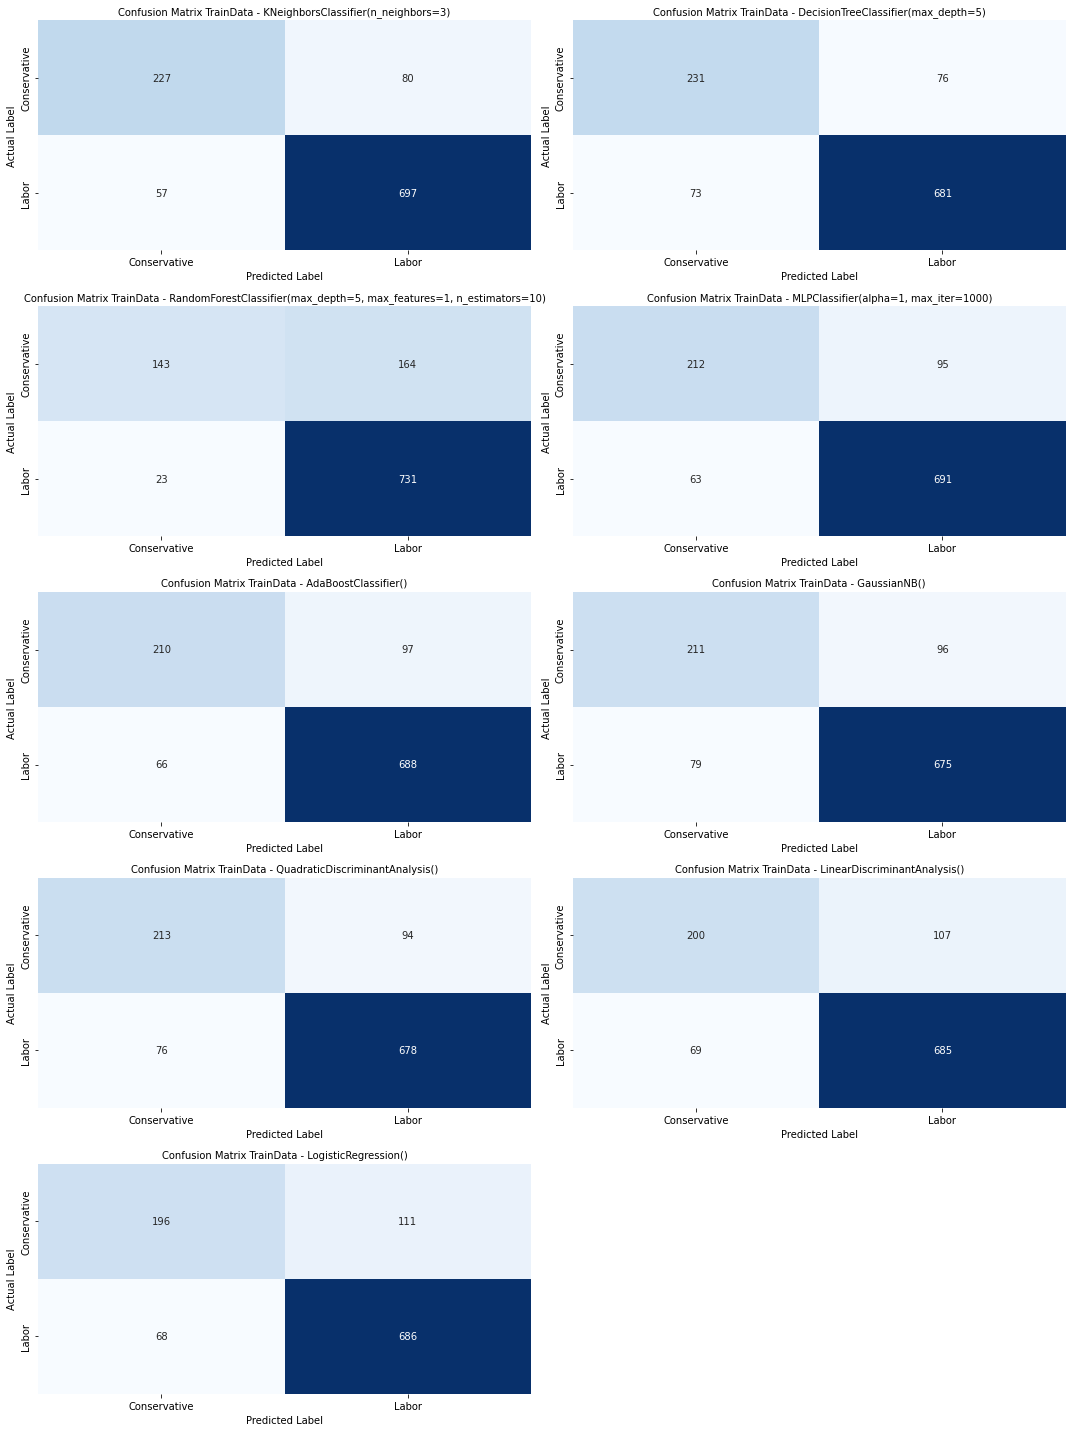

In [239]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,20))
labels = ['Conservative', 'Labor']
for index, model in enumerate(classifiers,1):
    model.fit(x_train,y_train)
    ytrain_predict = model.predict(x_train)
    ax = plt.subplot(5, 2, index)
    axes = sns.heatmap(confusion_matrix(y_train, ytrain_predict),annot=True, fmt='d',cbar=False, cmap=plt.cm.Blues, ax=ax)
    axes.set_xlabel('Predicted Label')
    axes.set_ylabel('Actual Label')
    axes.set_xticklabels(labels)
    axes.set_yticklabels(labels)
    plt.title('Confusion Matrix TrainData - {}'.format(model),fontdict={'fontsize': 10, 'fontweight': 'medium'})
    plt.tight_layout()
plt.show()

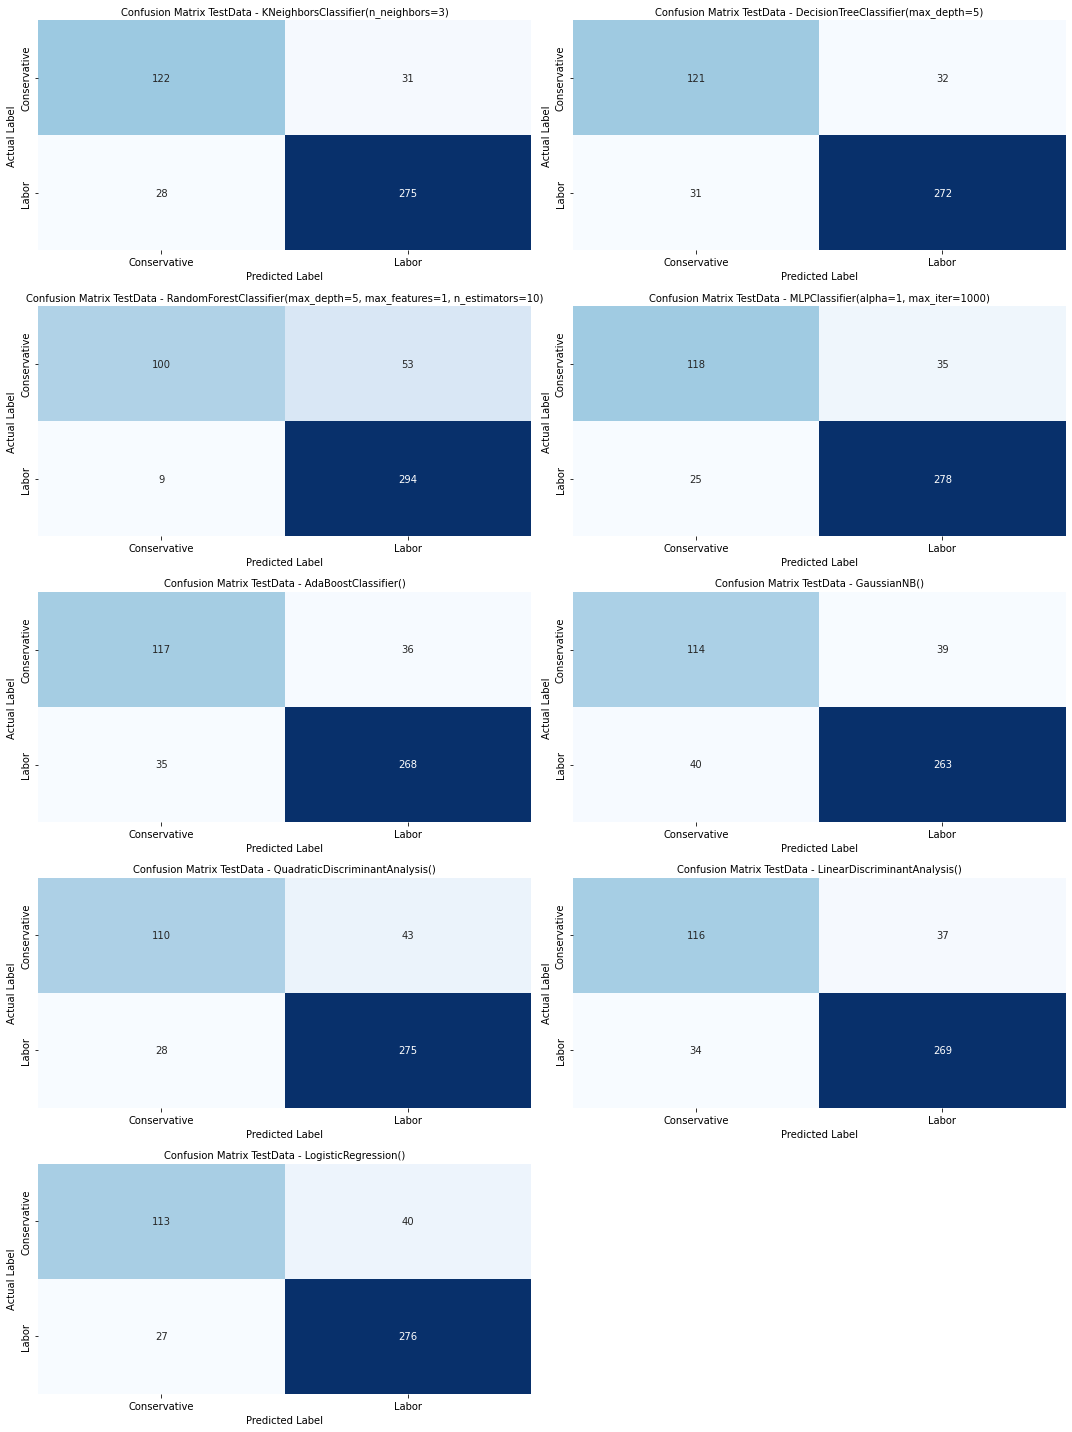

In [240]:
fig = plt.figure(figsize=(15,20))
labels = ['Conservative', 'Labor']
for index, model in enumerate(classifiers,1):
    model.fit(x_test,y_test)
    ytest_predict = model.predict(x_test)
    ax = plt.subplot(5, 2, index)
    axes = sns.heatmap(confusion_matrix(y_test, ytest_predict),annot=True, fmt='d',cbar=False, cmap=plt.cm.Blues, ax=ax)
    axes.set_xlabel('Predicted Label')
    axes.set_ylabel('Actual Label')
    axes.set_xticklabels(labels)
    axes.set_yticklabels(labels)
    plt.title('Confusion Matrix TestData - {}'.format(model),fontdict={'fontsize': 10, 'fontweight': 'medium'})
    plt.tight_layout()
plt.show()

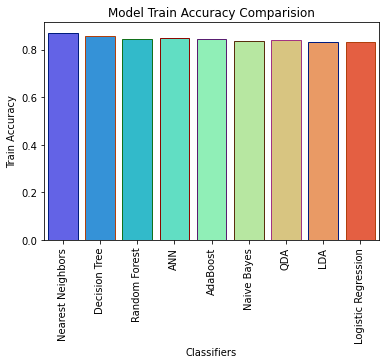

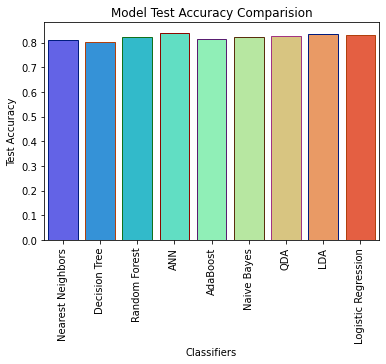

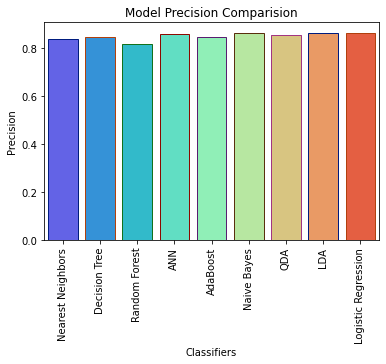

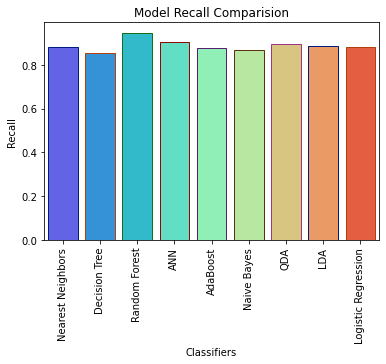

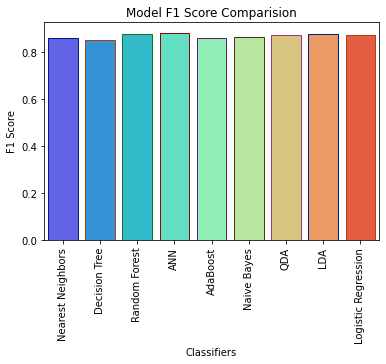

In [241]:
import seaborn as sns
sns.barplot(x='Classifiers',y='Train Accuracy', data=df, palette='rainbow',
            edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Model Train Accuracy Comparision')
plt.show()

import seaborn as sns
sns.barplot(x='Classifiers',y='Test Accuracy', data=df, palette='rainbow',
            edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Model Test Accuracy Comparision')
plt.show()


import seaborn as sns
sns.barplot(x='Classifiers',y='Precision', data=df, palette='rainbow',
            edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Model Precision Comparision')
plt.show()


import seaborn as sns
sns.barplot(x='Classifiers',y='Recall', data=df, palette='rainbow',
            edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Model Recall Comparision')
plt.show()


import seaborn as sns
sns.barplot(x='Classifiers',y='F1 Score', data=df, palette='rainbow',
            edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Model F1 Score Comparision')
plt.show()